The marketing and advertising team wants to know in which media the sales have performed best and they want a sales prediction with the best possible scenario avoiding to exceed the weekly historical costs in advertising on social media.

Let's import our dataset:

In [2]:
import pandas as pd
data_ads = pd.read_excel("C:/Users/CRISTINA/Documents/PORTFOLIO/Project Social Media/Social Media Advertising.xlsx")

Let's see the size of our dataset:

In [3]:
print(data_ads.shape)

(200, 7)


Let's see part of the content of our dataset to know it:

In [4]:
print(data_ads.head(10))

   PERIOD     MONTH  YEAR  YOUTUBE  INSTAGRAM  FACEBOOK  SALES
0  WEEK 1  FEBRUARY  2015     69.2       37.8     230.1   22.1
1  WEEK 2  FEBRUARY  2015     45.1       39.3      44.5   10.4
2  WEEK 3  FEBRUARY  2015     69.3       45.9      17.2    9.3
3  WEEK 4  FEBRUARY  2015     58.5       41.3     151.5   18.5
4  WEEK 1     MARCH  2015     58.4       10.8     180.8   12.9
5  WEEK 2     MARCH  2015     75.0       48.9       8.7    7.2
6  WEEK 3     MARCH  2015     23.5       32.8      57.5   11.8
7  WEEK 4     MARCH  2015     11.6       19.6     120.2   13.2
8  WEEK 1     APRIL  2015      1.0        2.1       8.6    4.8
9  WEEK 2     APRIL  2015     21.2        2.6     199.8   10.6


In [5]:
data_ads.tail()

,PERIOD,MONTH,YEAR,YOUTUBE,INSTAGRAM,FACEBOOK,SALES
195,WEEK 4,FEBRUARY,2019,13.8,3.7,38.2,7.6
196,WEEK 1,MARCH,2019,8.1,4.9,94.2,9.7
197,WEEK 2,MARCH,2019,6.4,9.3,177.0,12.8
198,WEEK 3,MARCH,2019,66.2,42.0,283.6,25.5
199,WEEK 4,MARCH,2019,8.7,8.6,232.1,13.4


In [6]:
print(data_ads.describe())

              YEAR     YOUTUBE   INSTAGRAM    FACEBOOK       SALES
count   200.000000  200.000000  200.000000  200.000000  200.000000
mean   2016.680000   30.554000   23.264000  147.042500   14.022500
std       1.226836   21.778621   14.846809   85.854236    5.217457
min    2015.000000    0.300000    0.000000    0.700000    1.600000
25%    2016.000000   12.750000    9.975000   74.375000   10.375000
50%    2017.000000   25.750000   22.900000  149.750000   12.900000
75%    2018.000000   45.100000   36.525000  218.825000   17.400000
max    2019.000000  114.000000   49.600000  296.400000   27.000000


When executing the previous function, we note that the lowest value of weekly sales during the analyzed period was  1.6 and the highest value was 27

Let's see the correlation that exists between sales and each of the variables:

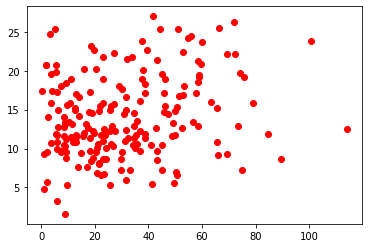

In [9]:
import matplotlib.pyplot as plt
plt.plot(data_ads["YOUTUBE"], data_ads["SALES"], "ro")

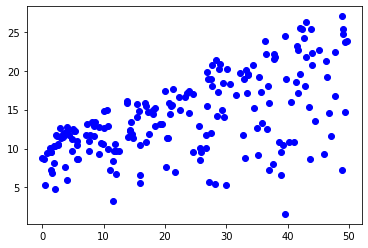

In [10]:
plt.plot(data_ads["INSTAGRAM"], data_ads["SALES"], "bo")

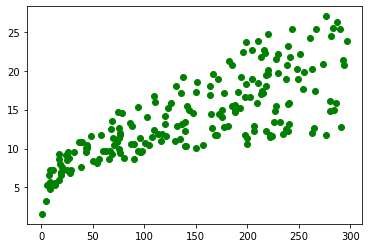

In [11]:
plt.plot(data_ads["FACEBOOK"], data_ads["SALES"], "go")

In the different scatter charts we saw that there seems to be a significant correlation between sales and variables such as facebook and instagram. While the correlation between sales and YouTube seems to be weak. To be more sure, let's check it with a correlation matrix:

In [13]:
data_ads.corr()

,YEAR,YOUTUBE,INSTAGRAM,FACEBOOK,SALES
YEAR,1.000000,-0.136720,-0.107817,0.016251,-0.043382
YOUTUBE,-0.136720,1.000000,0.354104,0.056648,0.228299
INSTAGRAM,-0.107817,0.354104,1.000000,0.054809,0.576223
FACEBOOK,0.016251,0.056648,0.054809,1.000000,0.782224
SALES,-0.043382,0.228299,0.576223,0.782224,1.000000


We found that does exist a strong positive correlation between Facebook and sales. We also see good behavior when it comes to Instagram.

Let's check by means of a linear regression which variables are the ones that best behave with respect to sales:

In [14]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd

In [15]:
data_ads = pd.read_excel("C:/Users/CRISTINA/Documents/PORTFOLIO/Project Social Media/Social Media Advertising.xlsx")

In [16]:
feature_cols = ["YOUTUBE", "INSTAGRAM", "FACEBOOK"]

In [17]:
X = data_ads[feature_cols]
Y = data_ads["SALES"]

In [18]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X,Y)

In [19]:
selector.support_

array([False,  True,  True])

Our model discards YouTube and shows us that the variables that best fit are Instagram and Facebook.

Let's see what was the maximum value of weekly advertising costs, so that our marketing team takes it into account

In [2]:
import pandas as pd
df = pd.read_excel("C:/Users/CRISTINA/Documents/PORTFOLIO/Project Social Media/Social Media Advertising.xlsx")
sum_column = df["YOUTUBE"] + df["INSTAGRAM"] + df["FACEBOOK"]
df["TOTAL WEEKLY ADVERTISING"] = sum_column
print(df)

     PERIOD     MONTH  YEAR  YOUTUBE  INSTAGRAM  FACEBOOK  SALES  \
0    WEEK 1  FEBRUARY  2015     69.2       37.8     230.1   22.1   
1    WEEK 2  FEBRUARY  2015     45.1       39.3      44.5   10.4   
2    WEEK 3  FEBRUARY  2015     69.3       45.9      17.2    9.3   
3    WEEK 4  FEBRUARY  2015     58.5       41.3     151.5   18.5   
4    WEEK 1     MARCH  2015     58.4       10.8     180.8   12.9   
..      ...       ...   ...      ...        ...       ...    ...   
195  WEEK 4  FEBRUARY  2019     13.8        3.7      38.2    7.6   
196  WEEK 1     MARCH  2019      8.1        4.9      94.2    9.7   
197  WEEK 2     MARCH  2019      6.4        9.3     177.0   12.8   
198  WEEK 3     MARCH  2019     66.2       42.0     283.6   25.5   
199  WEEK 4     MARCH  2019      8.7        8.6     232.1   13.4   

     TOTAL WEEKLY ADVERTISING  
0                       337.1  
1                       128.9  
2                       132.4  
3                       251.3  
4                      

In [3]:
df = pd.read_excel("C:/Users/CRISTINA/Documents/PORTFOLIO/Project Social Media/Social Media Advertising.xlsx")
sum_column = df["YOUTUBE"] + df["INSTAGRAM"] + df["FACEBOOK"]
df["TOTAL WEEKLY ADVERTISING"] = sum_column
print(df.describe())

              YEAR     YOUTUBE   INSTAGRAM    FACEBOOK       SALES  \
count   200.000000  200.000000  200.000000  200.000000  200.000000   
mean   2016.680000   30.554000   23.264000  147.042500   14.022500   
std       1.226836   21.778621   14.846809   85.854236    5.217457   
min    2015.000000    0.300000    0.000000    0.700000    1.600000   
25%    2016.000000   12.750000    9.975000   74.375000   10.375000   
50%    2017.000000   25.750000   22.900000  149.750000   12.900000   
75%    2018.000000   45.100000   36.525000  218.825000   17.400000   
max    2019.000000  114.000000   49.600000  296.400000   27.000000   

       TOTAL WEEKLY ADVERTISING  
count                200.000000  
mean                 200.860500  
std                   92.985181  
min                   11.700000  
25%                  123.550000  
50%                  207.350000  
75%                  281.125000  
max                  433.600000  


We must bear in mind that weekly advertising costs should not be greater than $433,6

Now let's build our model with the two variables that best fit (Instagram and Facebook)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X_pred = X[["INSTAGRAM", "FACEBOOK"]]

In [22]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.intercept_

2.9210999124051398

In [24]:
lm.coef_

array([0.18799423, 0.04575482])

In [27]:
lm.score(X_pred, Y)

0.8971942610828956

When analyzing the coefficient of determination we verify that there is a strong linear relationship

This would be the formula to predict sales with our model:

Sales: 2.9210999124051398 + 0.18799423 (Weekly costs Instagram) + 0.04575482 (Weekly cost Facebook)

The above linear regression is the most optimal model, and it will allow our marketing team to know in advance how much the estimated sales will be according to the costs that they decide to allocate weekly on Instagram and Facebook.